In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('seaborn')
%matplotlib inline

C:\Users\Daniela\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
movies = pd.read_csv("movies.csv", encoding = "cp1252")
len(movies)

6820

In [4]:
movies.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
# make sure that you run the read before running this a second time (command 28)
# did not have time to add error handling
movies.drop(['budget', 'company', 'director', 'name', 'writer'], axis=1, inplace=True)
movies.head(5)

,country,genre,gross,rating,released,runtime,score,star,votes,year
0,USA,Adventure,52287414.0,R,1986-08-22,89,8.1,Wil Wheaton,299174,1986
1,USA,Comedy,70136369.0,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,1986
2,USA,Action,179800601.0,PG,1986-05-16,110,6.9,Tom Cruise,236909,1986
3,USA,Action,85160248.0,R,1986-07-18,137,8.4,Sigourney Weaver,540152,1986
4,USA,Adventure,18564613.0,PG,1986-08-01,90,6.9,Joey Cramer,36636,1986


#  Scatter plots before transformations

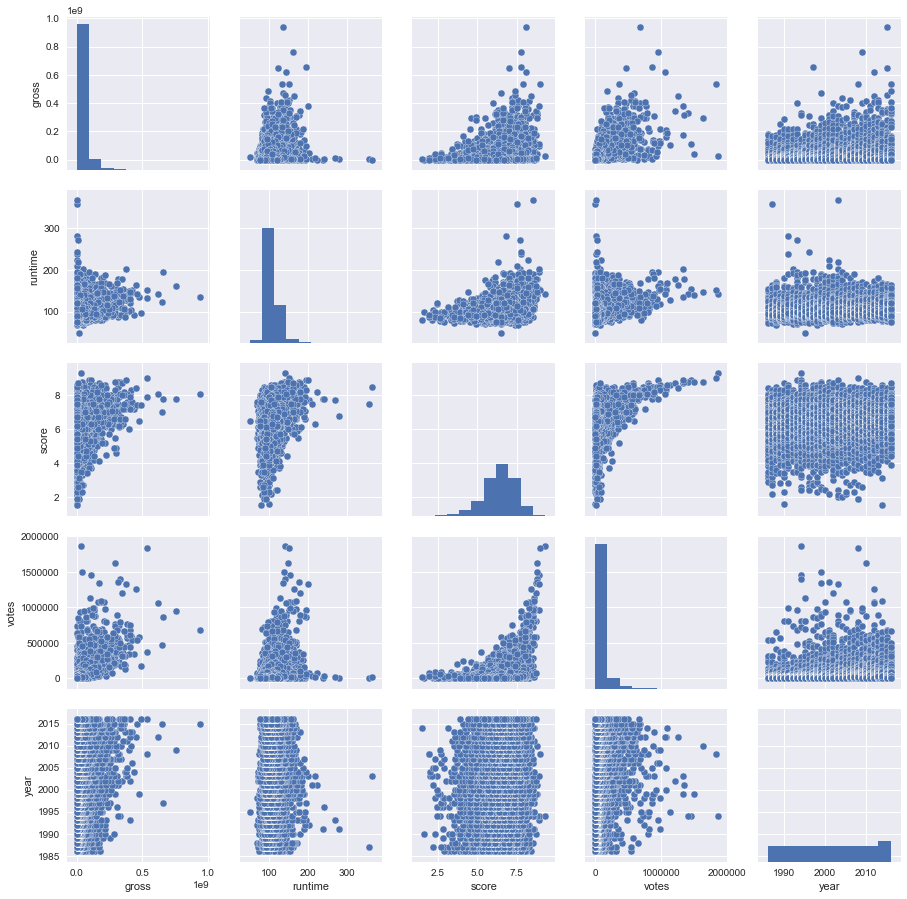

In [6]:
sns.pairplot(movies)

# Transforming "gross"

In [7]:
movies["gross_transformed"], method_gross = stats.boxcox(movies[['gross']])
method_gross

array([0.15785598])

# gross transformation >>> log(gross)

In [8]:
movies.head(5)

,country,genre,gross,rating,released,runtime,score,star,votes,year,gross_transformed
0,USA,Adventure,52287414.0,R,1986-08-22,89,8.1,Wil Wheaton,299174,1986,98.410305
1,USA,Comedy,70136369.0,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,1986,103.380620
2,USA,Action,179800601.0,PG,1986-05-16,110,6.9,Tom Cruise,236909,1986,120.958867
3,USA,Action,85160248.0,R,1986-07-18,137,8.4,Sigourney Weaver,540152,1986,106.794197
4,USA,Adventure,18564613.0,PG,1986-08-01,90,6.9,Joey Cramer,36636,1986,82.614813


# Nothing impressive so far

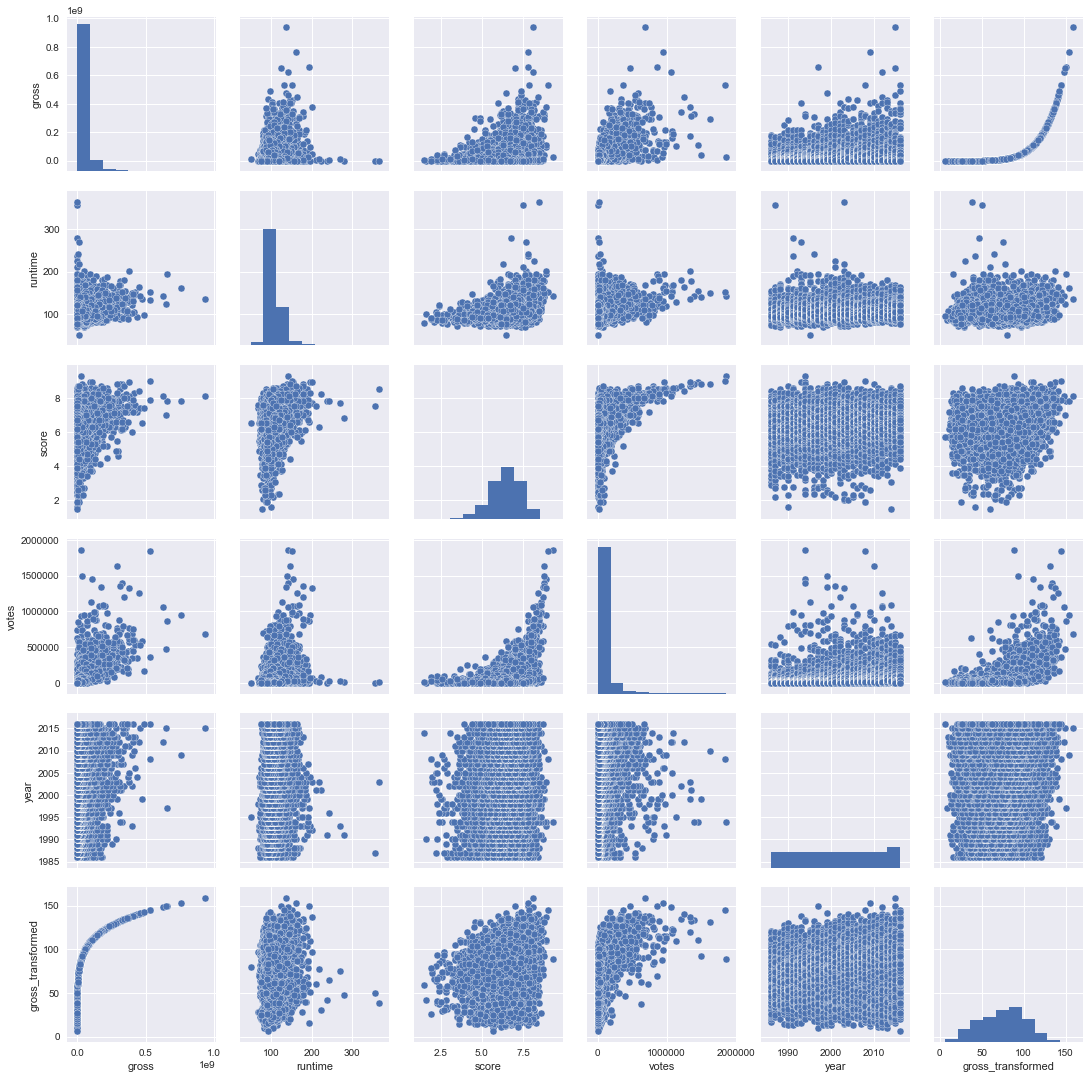

In [9]:
sns.pairplot(movies)

# Transforming the rest of the columns

In [10]:
movies["runtime_transformed"], method_runtime = stats.boxcox(movies[['runtime']])
method_runtime

array([-1.51233554])

# runtime transformation >>> $runtime^{-1} = 1/runtime$

In [11]:
movies["score_transformed"], method_score = stats.boxcox(movies[['score']])
method_score

array([2.09836283])

#  score transformation >>> $score^2$

In [12]:
movies["votes_transformed"], method_votes = stats.boxcox(movies[['votes']])
method_votes

array([0.06392907])

# votes transformation >>> log(votes)

In [13]:
movies["gross_transformed"], method_gross = stats.boxcox(movies[['gross']])
method_gross

array([0.15785598])

# gross transformation >>> log(gross)# 

# Scatter plots with all transformations

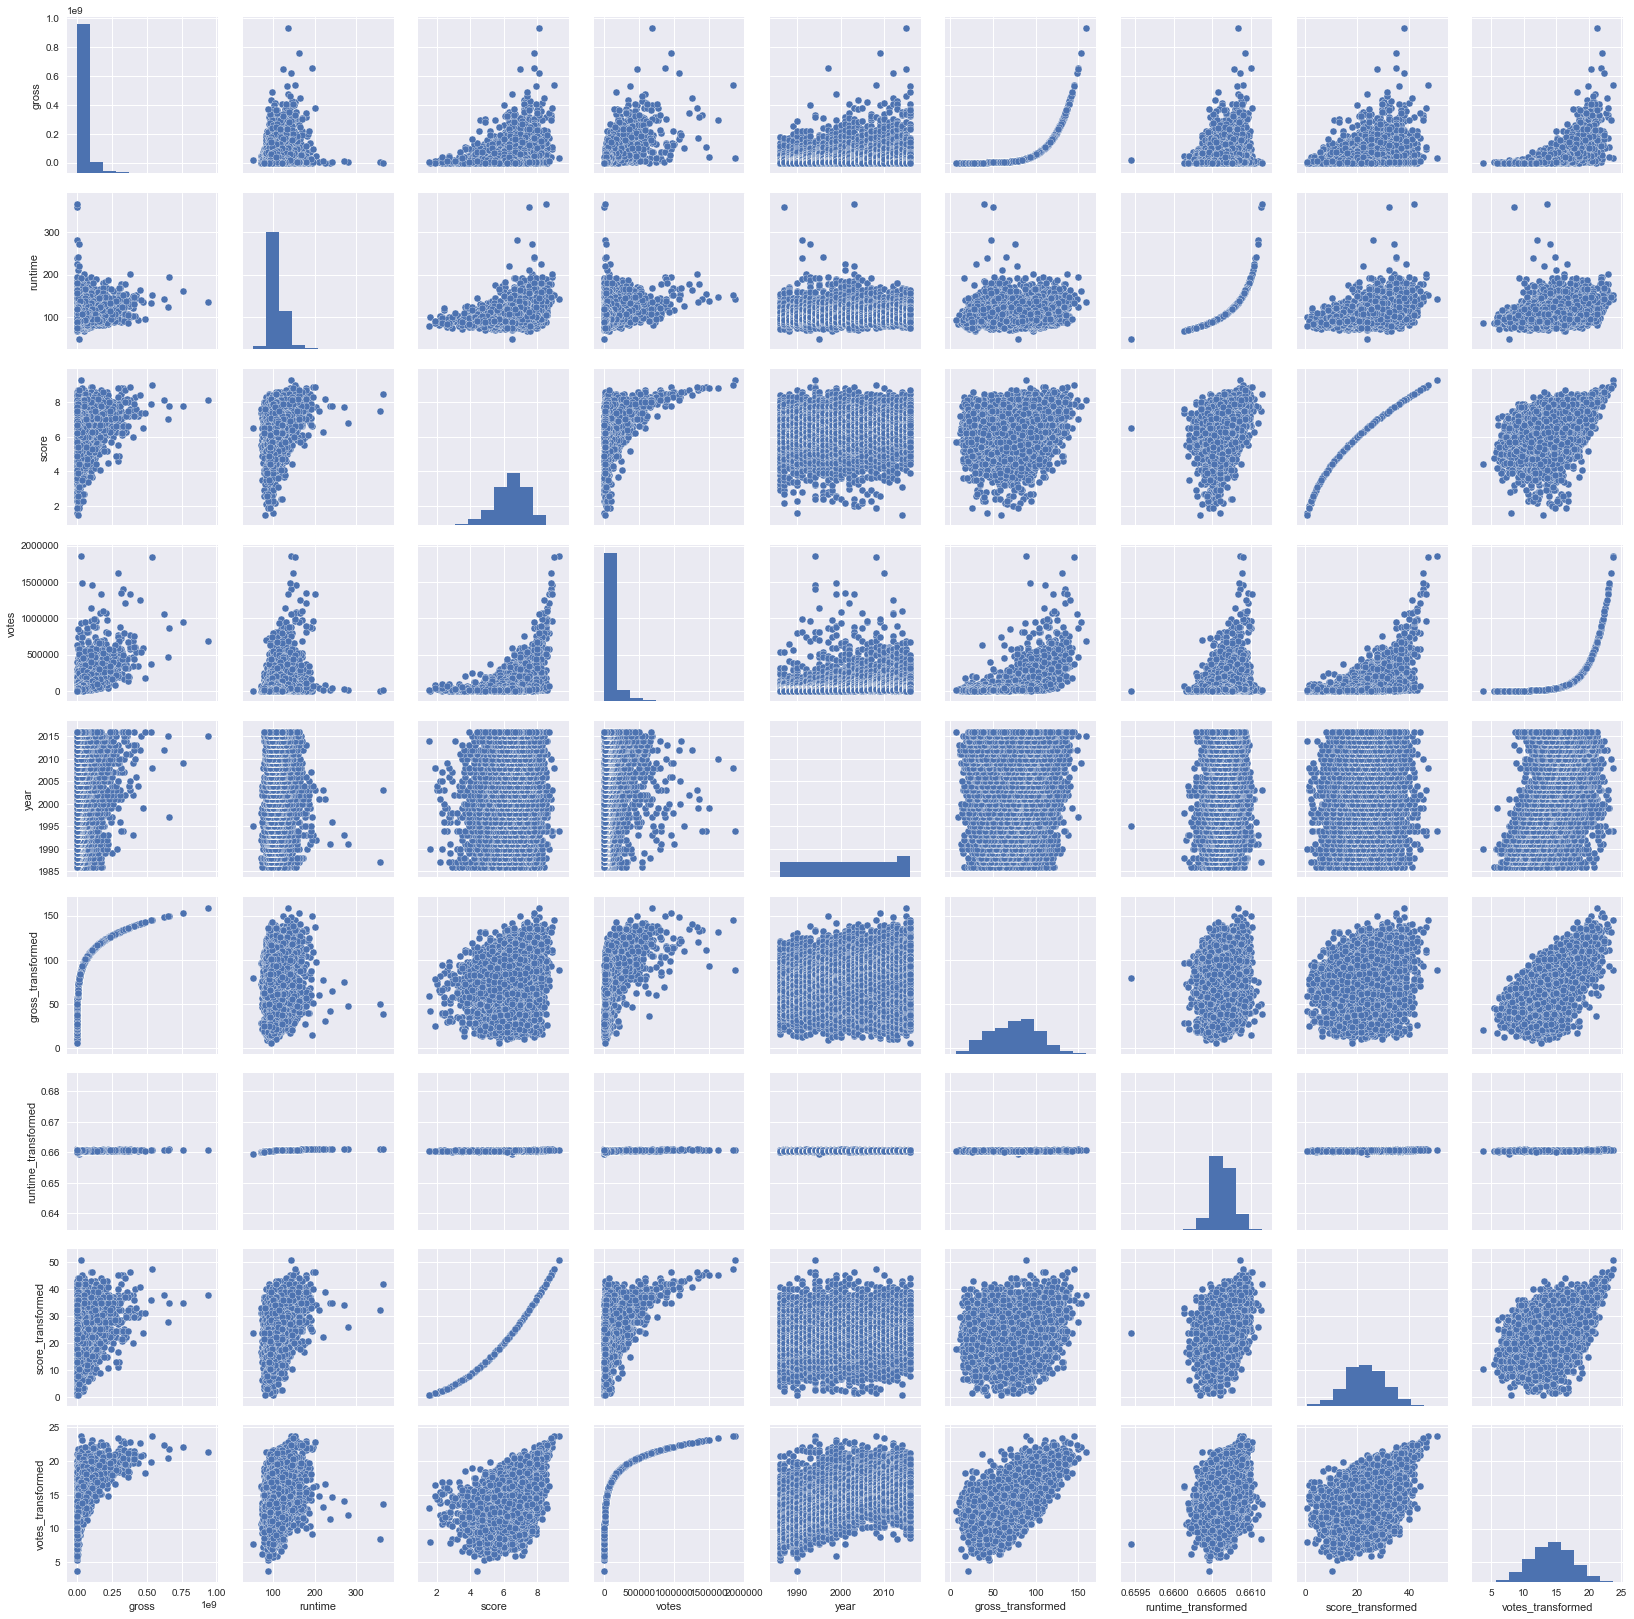

In [14]:
sns.pairplot(movies)

In [15]:
report_with_gross = sm.OLS.from_formula('gross ~ score_transformed + votes_transformed + C(genre) + C(rating)', movies).fit()
report_with_gross.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:47:32   Log-Likelihood:            -1.2974e+05
No. Observations:                6820   AIC:                         2.595e+05
Df Residuals:                    6789   BIC:                         2.597e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.265e+08   4.44e+07     -2.850      0.004   -2.13e+08   -3.95e+07
C(genre)[T.Adventure]       -5.11e+06   2.64e+06     -1.935      0.053   -1.03e+07    6.63e+04
C(genre)[T.Animation]       1.974e+07   3.44e+06      5.741      0.000     1.3e+07    2.65e+07
C(genre)[T.Biography]      -2.002e+07   2.74e+06     -7.308      0.000   -2.54e+07   -1.47e+07
C(genre)[T.Comedy]         -1.361e+07   1.61e+06     -8.460      0.000   -1.68e+07   -1.05e+07
C(genre)[T.Crime]          -1.752e+07   2.38e+06     -7.368      0.000   -2.22e+07   -1.29e+07
C(genre)[T.Drama]          -1.624e+07   1.82e+06     -8.922      0.000   -1.98e+07   -1.27e+07
C(genre)[T.Family]         -1.444e+07   1.21e+07     -1.192      0.233   -3.82e+07    9.31e+06
C(genre)[T.Fantasy]         -1.17e+07   7.94e+06     -1.473      0.141   -2.73e+07    3.86e+06
C(genre)[T.Horror]         -1.524e+07   2.96e+06     -5.150      0.000    -2.1e+07   -9.44e+06
C(genre)[T.Musical]        -2.039e+07   2.24e+07     -0.911      0.362   -6.43e+07    2.35e+07
C(genre)[T.Mystery]        -1.863e+07   7.29e+06     -2.554      0.011   -3.29e+07   -4.33e+06
C(genre)[T.Romance]        -9.628e+06   1.15e+07     -0.834      0.405   -3.23e+07     1.3e+07
C(genre)[T.Sci-Fi]         -2.651e+07   1.24e+07     -2.146      0.032   -5.07e+07    -2.3e+06
C(genre)[T.Thriller]        8.755e+04   1.06e+07      0.008      0.993   -2.06e+07    2.08e+07
C(genre)[T.War]             5.862e+06   3.14e+07      0.187      0.852   -5.56e+07    6.74e+07
C(genre)[T.Western]        -8.816e+06   3.14e+07     -0.281      0.779   -7.03e+07    5.27e+07
C(rating)[T.B15]            3.312e+07   6.27e+07      0.528      0.597   -8.98e+07    1.56e+08
C(rating)[T.G]              4.194e+07   4.45e+07      0.942      0.346   -4.53e+07    1.29e+08
C(rating)[T.NC-17]          8.535e+06   4.53e+07      0.188      0.851   -8.03e+07    9.74e+07
C(rating)[T.NOT RATED]      8.108e+06   4.44e+07      0.182      0.855    -7.9e+07    9.52e+07
C(rating)[T.Not specified]  2.904e+07   4.47e+07      0.650      0.516   -5.85e+07    1.17e+08
C(rating)[T.PG]             4.233e+07   4.44e+07      0.954      0.340   -4.46e+07    1.29e+08
C(rating)[T.PG-13]          3.735e+07   4.43e+07      0.842      0.400   -4.96e+07    1.24e+08
C(rating)[T.R]              1.659e+07   4.43e+07      0.374      0.708   -7.03e+07    1.03e+08
C(rating)[T.TV-14]          1.989e+07   6.27e+07      0.317      0.751   -1.03e+08    1.43e+08
C(rating)[T.TV-MA]           5.41e+07   6.27e+07      0.863      0.388   -6.88e+07    1.77e+08
C(rating)[T.TV-PG]          5.649e+07   6.27e+07      0.901      0.367   -6.64e+07    1.79e+08
C(rating)[T.UNRATED]        1.958e+07   4.46e+07      0.439      0.661   -6.79e+07    1.07e+08
score_transformed          -1.677e+05    9.

In [16]:
report_with_gross_transformed = sm.OLS.from_formula('gross_transformed ~ score_transformed + votes_transformed + C(genre) + C(rating)', movies).fit()
report_with_gross_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      gross_transformed   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     324.8
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:47:45   Log-Likelihood:                -29066.
No. Observations:                6820   AIC:                         5.819e+04
Df Residuals:                    6789   BIC:                         5.841e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -18.0182     17.234     -1.046      0.296     -51.802      15.766
C(genre)[T.Adventure]         -2.2535      1.025     -2.198      0.028      -4.264      -0.243
C(genre)[T.Animation]          0.3996      1.336      0.299      0.765      -2.219       3.018
C(genre)[T.Biography]         -2.3360      1.064     -2.195      0.028      -4.422      -0.250
C(genre)[T.Comedy]            -2.4501      0.625     -3.920      0.000      -3.675      -1.225
C(genre)[T.Crime]             -4.1043      0.924     -4.444      0.000      -5.915      -2.294
C(genre)[T.Drama]             -5.0306      0.707     -7.114      0.000      -6.417      -3.644
C(genre)[T.Family]            -4.1148      4.707     -0.874      0.382     -13.342       5.112
C(genre)[T.Fantasy]           -2.3533      3.083     -0.763      0.445      -8.396       3.690
C(genre)[T.Horror]            -4.5512      1.149     -3.960      0.000      -6.804      -2.298
C(genre)[T.Musical]           -7.5103      8.694     -0.864      0.388     -24.553       9.533
C(genre)[T.Mystery]           -4.1122      2.832     -1.452      0.147      -9.664       1.440
C(genre)[T.Romance]           -3.0978      4.486     -0.691      0.490     -11.891       5.695
C(genre)[T.Sci-Fi]           -10.1546      4.797     -2.117      0.034     -19.558      -0.752
C(genre)[T.Thriller]          -5.7882      4.098     -1.413      0.158     -13.821       2.245
C(genre)[T.War]               -5.3842     12.184     -0.442      0.659     -29.269      18.500
C(genre)[T.Western]           -3.2690     12.178     -0.268      0.788     -27.143      20.605
C(rating)[T.B15]              -4.6511     24.342     -0.191      0.848     -52.370      43.068
C(rating)[T.G]                39.5985     17.292      2.290      0.022       5.700      73.497
C(rating)[T.NC-17]            10.7615     17.604      0.611      0.541     -23.748      45.271
C(rating)[T.NOT RATED]        -3.4306     17.263     -0.199      0.842     -37.271      30.409
C(rating)[T.Not specified]    13.1920     17.351      0.760      0.447     -20.821      47.205
C(rating)[T.PG]               35.5489     17.226      2.064      0.039       1.780      69.318
C(rating)[T.PG-13]            30.4677     17.219      1.769      0.077      -3.287      64.223
C(rating)[T.R]                19.1092     17.216      1.110      0.267     -14.639      52.858
C(rating)[T.TV-14]             3.8847     24.339      0.160      0.873     -43.828      51.597
C(rating)[T.TV-MA]            21.1872     24.341      0.870      0.384     -26.528      68.903
C(rating)[T.TV-PG]            38.6587     24.341      1.588      0.112      -9.058      86.376
C(rating)[T.UNRATED]           4.8495     17.334      0.280      0.780     -29.132      38.831
score_transformed             -0.5692      

# "report_with_gross_transformed" looks better and I am not sure? :)   
NEED TO DISCUSS